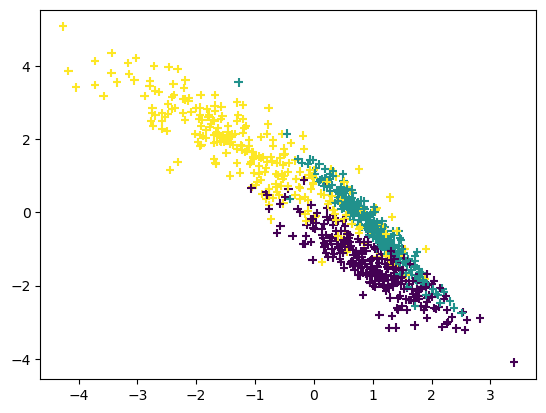

In [12]:
#generating the dataset

from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

X, y = make_classification(
    n_features=6,
    n_classes=3,
    n_samples=800,
    n_informative=2,
    random_state=1,
    n_clusters_per_class=1,
)

plt.scatter(X[:, 0], X[:, 1], c=y, marker="+");

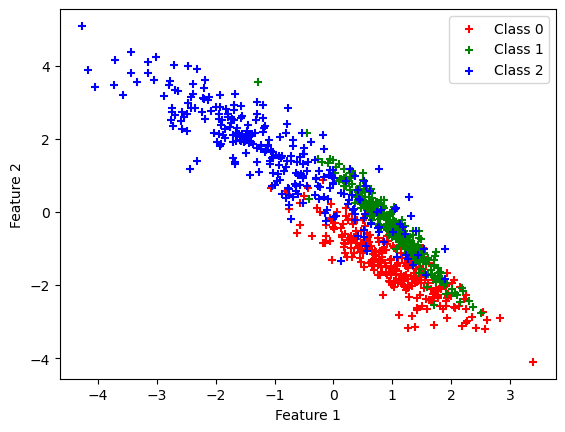

In [17]:
# generating the dataset
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import numpy as np

# Create dataset
X, y = make_classification(
    n_features=6,
    n_classes=3,
    n_samples=800,
    n_informative=2,
    random_state=1,
    n_clusters_per_class=1,
)

colors = {0: 'red', 1: 'green', 2: 'blue'}

# Plot each class with its color
for class_label in np.unique(y):
    plt.scatter(
        X[y == class_label, 0], 
        X[y == class_label, 1],
        color=colors[class_label], 
        label=f"Class {class_label}",
        marker="+"
    )

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=125
)

In [10]:
#Model building and training

from sklearn.naive_bayes import GaussianNB

# Build a Gaussian Classifier
model = GaussianNB()

# Model training
model.fit(X_train, y_train)

# Predict Output
predicted = model.predict([X_test[6]])

print("Actual Value:", y_test[6])
print("Predicted Value:", predicted[0])

Actual Value: 0
Predicted Value: 0


In [13]:
#Model Evaluation 

from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
)

y_pred = model.predict(X_test)
accuray = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test, average="weighted")

print("Accuracy:", accuray)
print("F1 Score:", f1)

Accuracy: 0.8484848484848485
F1 Score: 0.8491119695890328


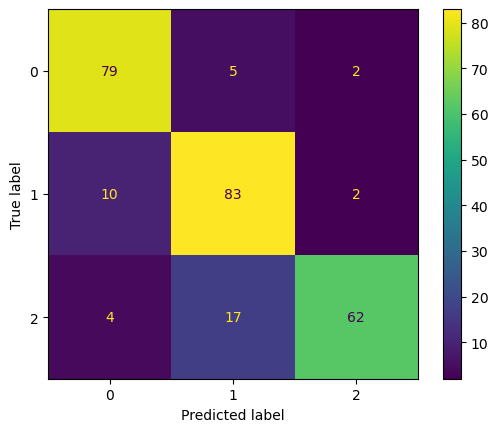

In [14]:
labels = [0,1,2]
cm = confusion_matrix(y_test, y_pred, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot();

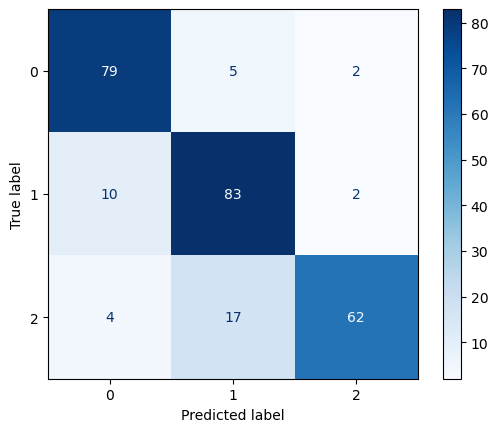

In [16]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

labels = [0, 1, 2]
cm = confusion_matrix(y_test, y_pred, labels=labels)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Blues)  
plt.show()


# Naive Bayes Classifier with loan dataset 

In [1]:
import pandas as pd


df = pd.read_csv("C:/Users/user5/Downloads/datalab_export_2025-08-14 15_55_26.csv")
df.head()

,index,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [2]:
#data exploration
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              100 non-null    int64  
 1   credit.policy      100 non-null    int64  
 2   purpose            100 non-null    object 
 3   int.rate           100 non-null    float64
 4   installment        100 non-null    float64
 5   log.annual.inc     100 non-null    float64
 6   dti                100 non-null    float64
 7   fico               100 non-null    int64  
 8   days.with.cr.line  100 non-null    float64
 9   revol.bal          100 non-null    int64  
 10  revol.util         100 non-null    float64
 11  inq.last.6mths     100 non-null    int64  
 12  delinq.2yrs        100 non-null    int64  
 13  pub.rec            100 non-null    int64  
 14  not.fully.paid     100 non-null    int64  
dtypes: float64(6), int64(8), object(1)
memory usage: 11.8+ KB


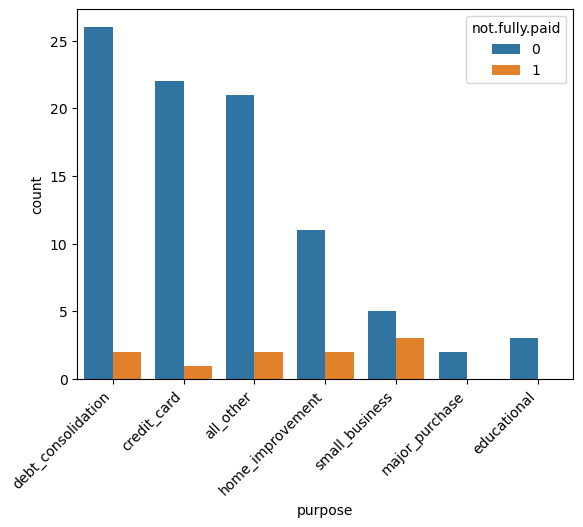

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df,x='purpose',hue='not.fully.paid')
plt.xticks(rotation=45, ha='right');

In [6]:
#data processing

pre_df = pd.get_dummies(df,columns=['purpose'],drop_first=True)
pre_df.head(7)

,index,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,False,True,False,False,False,False
1,1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,True,False,False,False,False,False
2,2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,False,True,False,False,False,False
3,3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,False,True,False,False,False,False
4,4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,True,False,False,False,False,False
5,5,1,0.0788,125.13,11.904968,16.98,727,6120.041667,50807,51.0,0,0,0,0,True,False,False,False,False,False
6,6,1,0.1496,194.02,10.714418,4.00,667,3180.041667,3839,76.8,0,0,1,1,False,True,False,False,False,False


In [8]:
from sklearn.model_selection import train_test_split

X = pre_df.drop('not.fully.paid', axis=1)
y = pre_df['not.fully.paid']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=125
)

In [9]:
#model building and training

from sklearn.naive_bayes import GaussianNB

model = GaussianNB()

model.fit(X_train, y_train);

In [10]:
#Model evaluation

from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
    classification_report,
)

y_pred = model.predict(X_test)

accuray = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test, average="weighted")

print("Accuracy:", accuray)
print("F1 Score:", f1)

Accuracy: 0.8484848484848485
F1 Score: 0.9180327868852458


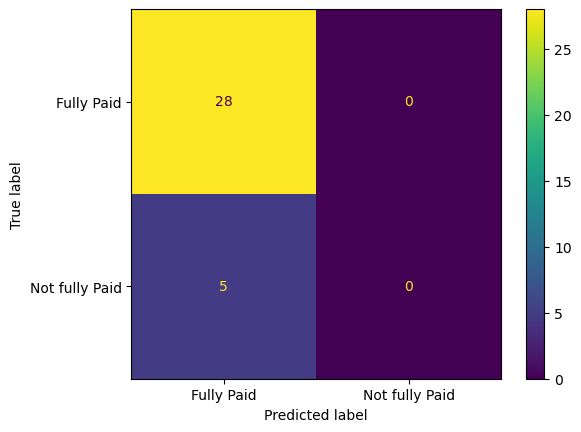

In [11]:
labels = ["Fully Paid", "Not fully Paid"]
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot();

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report


X = df.drop(['index', 'not.fully.paid'], axis=1)
y = df['not.fully.paid']
X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91        27
           1       0.00      0.00      0.00         3

    accuracy                           0.83        30
   macro avg       0.45      0.46      0.45        30
weighted avg       0.80      0.83      0.82        30

